<a href="https://colab.research.google.com/github/vedantpople4/ML_Projects/blob/master/DMT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [ ]:
(X, Y), (Xtest, Ytest) = mnist.load_data()
img_width, img_height = X[0].shape
X = X/255
Xtest = Xtest/255

11493376/11490434 [==============================] - 1s 0us/step


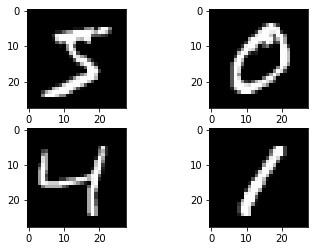

In [ ]:
plt.subplot(221)
plt.imshow(X[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X[3], cmap=plt.get_cmap('gray'))
plt.show()


In [ ]:
X = X.reshape(X.shape[0], img_width*img_height)
X -= X.mean(axis=0)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
results = []
names = []
for name, model in models:
 kfold = KFold(n_splits=10, random_state=7)
 cv_results = cross_val_score(model, X_reduced, Y, cv=kfold, scoring='accuracy')
 results.append(cv_results)
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)

LR: 0.443117 (0.008972)
LDA: 0.435367 (0.007580)
KNN: 0.413950 (0.007277)
CART: 0.377050 (0.006299)
NB: 0.439117 (0.008340)


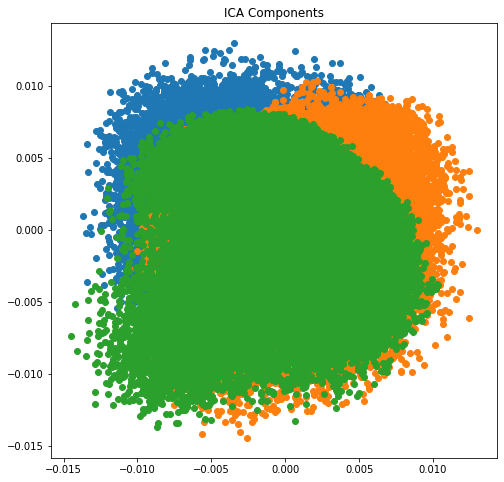

In [ ]:
from sklearn.decomposition import FastICA
ICA = FastICA(n_components=3, random_state=12)
X_ICA_reduced = ICA.fit_transform(X)
plt.figure(figsize=(8,8))
plt.title('ICA Components')
plt.scatter(X_ICA_reduced[:,0], X_ICA_reduced[:,1])
plt.scatter(X_ICA_reduced[:,1], X_ICA_reduced[:,2])
plt.scatter(X_ICA_reduced[:,2], X_ICA_reduced[:,0])

In [ ]:
from sklearn.manifold import TSNE 
N=10000
import numpy as np
np.random.seed(0)
tsne = TSNE()
X_tsne = tsne.fit_transform(X_reduced[:N])



In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
results = []
names = []
for name, model in models:
 kfold = KFold(n_splits=10, random_state=7)
 cv_results = cross_val_score(model, X_tsne, Y[0:10000], cv=kfold, scoring='accuracy')
 results.append(cv_results)
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)

LR: 0.434500 (0.024109)
LDA: 0.425600 (0.021224)
KNN: 0.416500 (0.014767)
CART: 0.384300 (0.015460)
NB: 0.433300 (0.018320)
SVM: 0.472400 (0.015876)
